In [19]:
from utilidades import calcular_cuantiles, rangointercuartil, limites, detectar_outliers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model



# Identificación de outliers

In [7]:
import os
print(os.getcwd())  # Esto imprime el directorio desde el que se está ejecutando el código


c:\Users\Fernando\Desktop\Yo\Programacion\proyectos\Diamantes\notebooks


In [11]:
df_cleaning = pd.read_csv('../data/df_eda.csv')
df_cleaning.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,38.718000


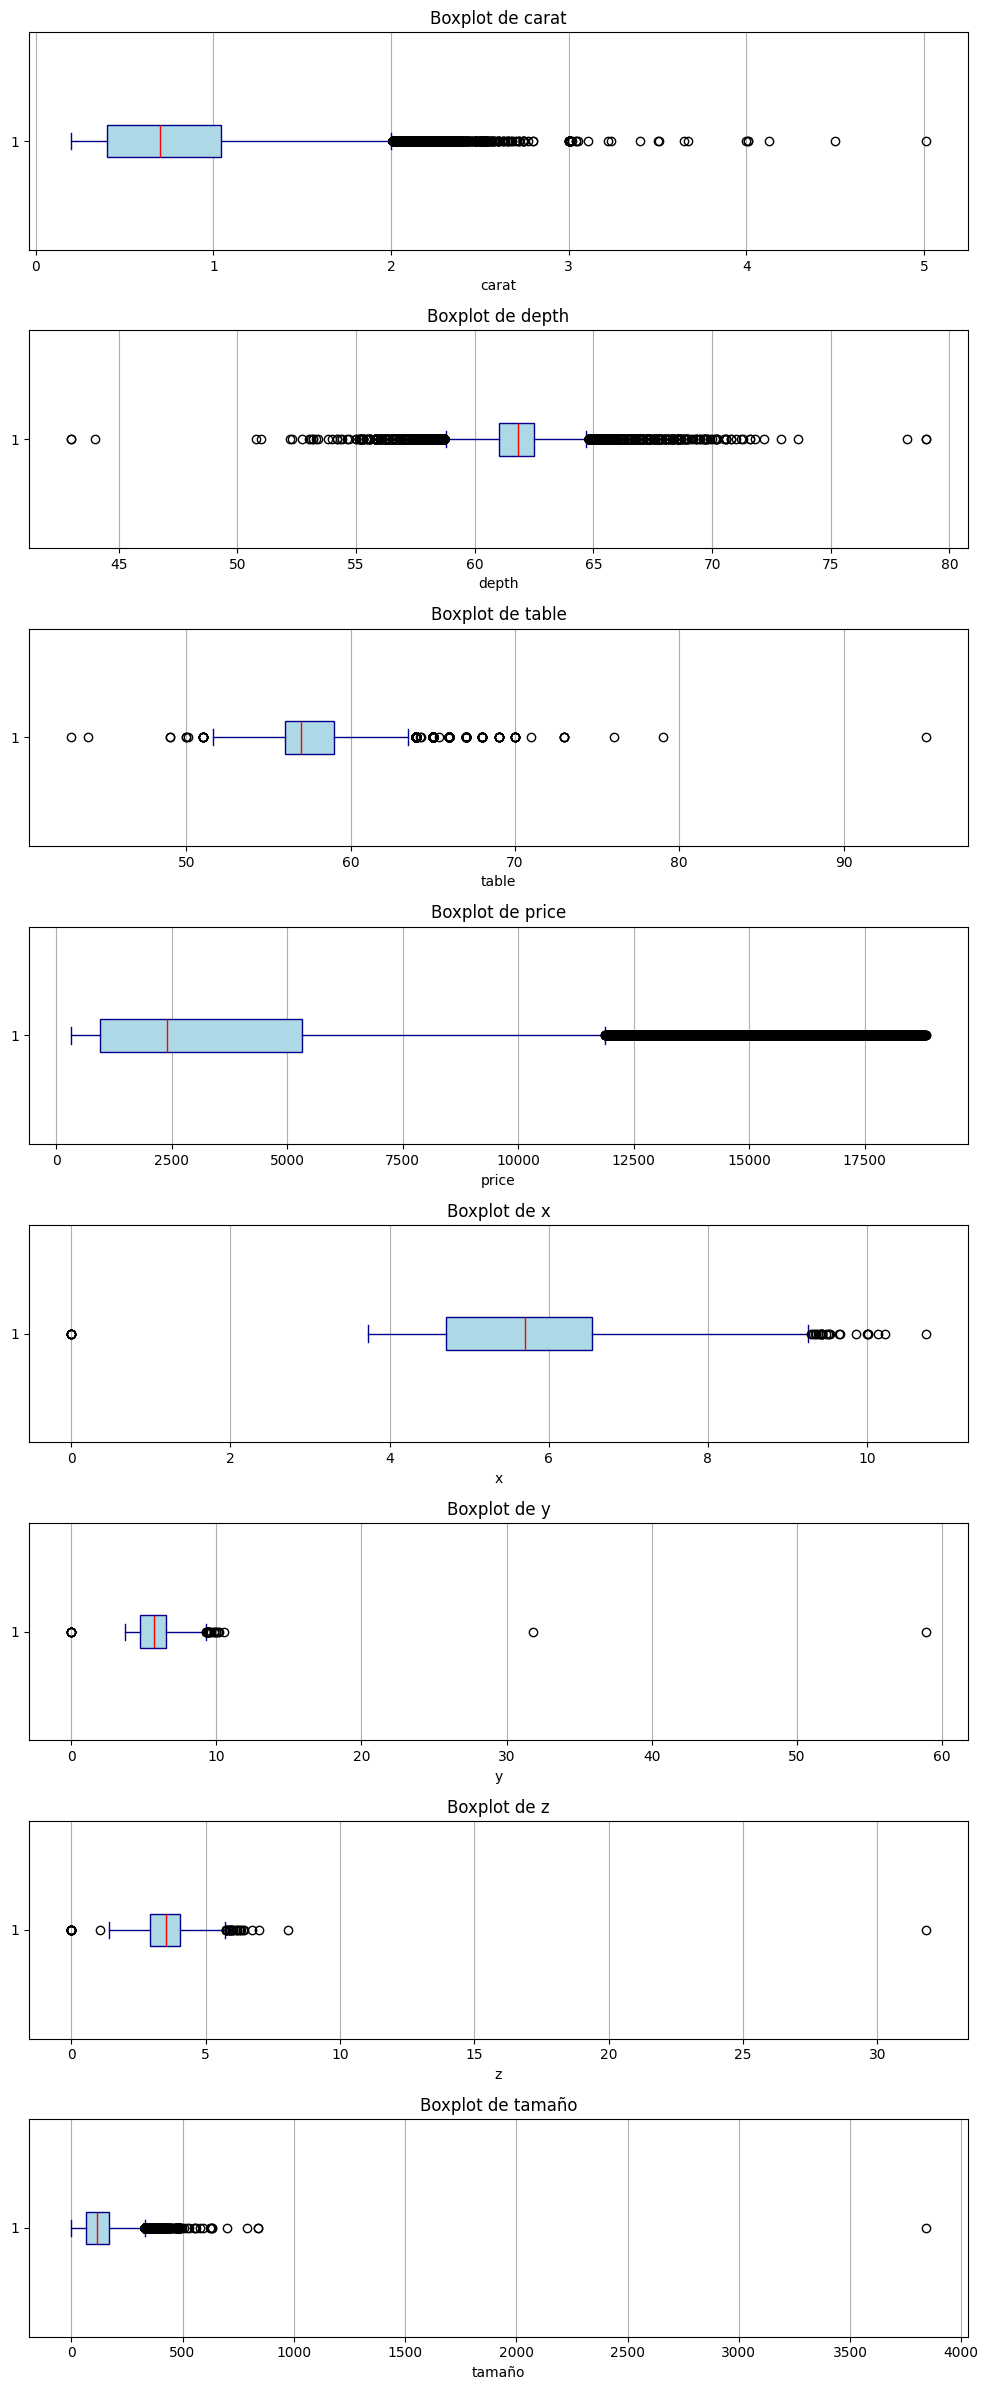

In [12]:
numerical_columns = df_cleaning.select_dtypes(include='number').columns

plt.figure(figsize=(10, len(numerical_columns) * 3))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    plt.boxplot(df_cleaning[column], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='darkblue'),
                medianprops=dict(color='red'), whiskerprops=dict(color='darkblue'),
                capprops=dict(color='darkblue'))
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.grid(axis='x')

plt.tight_layout()
plt.show()

In [20]:
calcular_cuantiles(df_cleaning)

,Variable,0.75,0.5,0.25,IQR,Limite inferior,Limite superior
0,carat,1.040000,0.700000,0.40000,0.640000,-0.560000,2.000000
1,depth,62.500000,61.800000,61.00000,1.500000,58.750000,64.750000
2,table,59.000000,57.000000,56.00000,3.000000,51.500000,63.500000
3,price,5324.250000,2401.000000,950.00000,4374.250000,-5611.375000,11885.625000
4,x,6.540000,5.700000,4.71000,1.830000,1.965000,9.285000
5,y,6.540000,5.710000,4.72000,1.820000,1.990000,9.270000
6,z,4.040000,3.530000,2.91000,1.130000,1.215000,5.735000
7,tamaño,170.842451,114.808572,65.13683,105.705621,-93.421601,329.400881
